### Data

In [24]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


# Import 1h data
df_h1 = pd.read_csv("Gemini_BTCUSD_1h_clean.csv", parse_dates=["Time"])
df_h1 = df_h1.sort_values("Time").reset_index(drop=True)

In [25]:
df_h1

,Time,Open,High,Low,Close,Volume
0,2018-12-01 00:00:00+00:00,3970.00,3980.47,3946.24,3976.71,102.088463
1,2018-12-01 01:00:00+00:00,3976.71,3990.19,3962.32,3971.99,51.641599
2,2018-12-01 02:00:00+00:00,3971.99,3972.00,3950.00,3952.13,26.690361
3,2018-12-01 03:00:00+00:00,3952.13,3975.55,3940.18,3969.56,22.333094
4,2018-12-01 04:00:00+00:00,3969.56,3969.56,3933.00,3942.00,30.501481
...,...,...,...,...,...,...
60641,2025-10-31 20:00:00+00:00,109743.85,109750.14,109259.50,109395.79,17.680344
60642,2025-10-31 21:00:00+00:00,109395.79,109679.55,109275.36,109499.80,8.105973
60643,2025-10-31 22:00:00+00:00,109499.80,109754.33,109417.63,109529.30,5.290940
60644,2025-10-31 23:00:00+00:00,109529.30,109632.00,109448.24,109556.99,2.368147


### Calculate Return: Use Close_1H

In [26]:
df_h1['Return'] = df_h1['Close'].pct_change()
df_h1

,Time,Open,High,Low,Close,Volume,Return
0,2018-12-01 00:00:00+00:00,3970.00,3980.47,3946.24,3976.71,102.088463,NaN
1,2018-12-01 01:00:00+00:00,3976.71,3990.19,3962.32,3971.99,51.641599,-0.001187
2,2018-12-01 02:00:00+00:00,3971.99,3972.00,3950.00,3952.13,26.690361,-0.005000
3,2018-12-01 03:00:00+00:00,3952.13,3975.55,3940.18,3969.56,22.333094,0.004410
4,2018-12-01 04:00:00+00:00,3969.56,3969.56,3933.00,3942.00,30.501481,-0.006943
...,...,...,...,...,...,...,...
60641,2025-10-31 20:00:00+00:00,109743.85,109750.14,109259.50,109395.79,17.680344,-0.003172
60642,2025-10-31 21:00:00+00:00,109395.79,109679.55,109275.36,109499.80,8.105973,0.000951
60643,2025-10-31 22:00:00+00:00,109499.80,109754.33,109417.63,109529.30,5.290940,0.000269
60644,2025-10-31 23:00:00+00:00,109529.30,109632.00,109448.24,109556.99,2.368147,0.000253


### Calculate MACD & Signal

In [27]:
# 参数设置：典型为(12, 26, 9)
fast, slow, signal = 12, 26, 9

df_h1["EMA_fast"] = df_h1["Close"].ewm(span=fast, adjust=False).mean()
df_h1["EMA_slow"] = df_h1["Close"].ewm(span=slow, adjust=False).mean()

df_h1["MACD"] = df_h1["EMA_fast"] - df_h1["EMA_slow"]
df_h1["Signal"] = df_h1["MACD"].ewm(span=signal, adjust=False).mean()
df_h1["Hist"] = df_h1["MACD"] - df_h1["Signal"]

In [28]:
df_h1

,Time,Open,High,Low,Close,Volume,Return,EMA_fast,EMA_slow,MACD,Signal,Hist
0,2018-12-01 00:00:00+00:00,3970.00,3980.47,3946.24,3976.71,102.088463,NaN,3976.710000,3976.710000,0.000000,0.000000,0.000000
1,2018-12-01 01:00:00+00:00,3976.71,3990.19,3962.32,3971.99,51.641599,-0.001187,3975.983846,3976.360370,-0.376524,-0.075305,-0.301219
2,2018-12-01 02:00:00+00:00,3971.99,3972.00,3950.00,3952.13,26.690361,-0.005000,3972.314024,3974.565528,-2.251504,-0.510545,-1.740960
3,2018-12-01 03:00:00+00:00,3952.13,3975.55,3940.18,3969.56,22.333094,0.004410,3971.890328,3974.194748,-2.304421,-0.869320,-1.435101
4,2018-12-01 04:00:00+00:00,3969.56,3969.56,3933.00,3942.00,30.501481,-0.006943,3967.291816,3971.809952,-4.518136,-1.599083,-2.919053
...,...,...,...,...,...,...,...,...,...,...,...,...
60641,2025-10-31 20:00:00+00:00,109743.85,109750.14,109259.50,109395.79,17.680344,-0.003172,109575.913575,109535.369962,40.543613,60.958676,-20.415063
60642,2025-10-31 21:00:00+00:00,109395.79,109679.55,109275.36,109499.80,8.105973,0.000951,109564.203794,109532.735150,31.468644,55.060670,-23.592026
60643,2025-10-31 22:00:00+00:00,109499.80,109754.33,109417.63,109529.30,5.290940,0.000269,109558.833980,109532.480694,26.353285,49.319193,-22.965908
60644,2025-10-31 23:00:00+00:00,109529.30,109632.00,109448.24,109556.99,2.368147,0.000253,109558.550290,109534.296198,24.254092,44.306173,-20.052081


### Generating Trading Signal and Position Logic

In [29]:
df_h1["Long"] = 0

# 当上一根K线的MACD < Signal 且此根K线的MACD > Signal → 开多
df_h1.loc[(df_h1["MACD"] > df_h1["Signal"]) & 
          (df_h1["MACD"].shift(1) <= df_h1["Signal"].shift(1)), "Long"] = 1

# 当上一根K线的MACD > Signal 且此根K线的MACD < Signal → 平仓
df_h1.loc[(df_h1["MACD"] < df_h1["Signal"]) & 
          (df_h1["MACD"].shift(1) >= df_h1["Signal"].shift(1)), "Long"] = -1

# 构建持仓序列：1 表示已持仓，0 表示空仓
df_h1["Position"] = np.nan
df_h1.loc[df_h1["Long"] == 1, "Position"] = 1
df_h1.loc[df_h1["Long"] == -1, "Position"] = 0
df_h1["Position"] = df_h1["Position"].ffill().fillna(0)

In [30]:
df_h1

,Time,Open,High,Low,Close,Volume,Return,EMA_fast,EMA_slow,MACD,Signal,Hist,Long,Position
0,2018-12-01 00:00:00+00:00,3970.00,3980.47,3946.24,3976.71,102.088463,NaN,3976.710000,3976.710000,0.000000,0.000000,0.000000,0,0.0
1,2018-12-01 01:00:00+00:00,3976.71,3990.19,3962.32,3971.99,51.641599,-0.001187,3975.983846,3976.360370,-0.376524,-0.075305,-0.301219,-1,0.0
2,2018-12-01 02:00:00+00:00,3971.99,3972.00,3950.00,3952.13,26.690361,-0.005000,3972.314024,3974.565528,-2.251504,-0.510545,-1.740960,0,0.0
3,2018-12-01 03:00:00+00:00,3952.13,3975.55,3940.18,3969.56,22.333094,0.004410,3971.890328,3974.194748,-2.304421,-0.869320,-1.435101,0,0.0
4,2018-12-01 04:00:00+00:00,3969.56,3969.56,3933.00,3942.00,30.501481,-0.006943,3967.291816,3971.809952,-4.518136,-1.599083,-2.919053,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60641,2025-10-31 20:00:00+00:00,109743.85,109750.14,109259.50,109395.79,17.680344,-0.003172,109575.913575,109535.369962,40.543613,60.958676,-20.415063,0,0.0
60642,2025-10-31 21:00:00+00:00,109395.79,109679.55,109275.36,109499.80,8.105973,0.000951,109564.203794,109532.735150,31.468644,55.060670,-23.592026,0,0.0
60643,2025-10-31 22:00:00+00:00,109499.80,109754.33,109417.63,109529.30,5.290940,0.000269,109558.833980,109532.480694,26.353285,49.319193,-22.965908,0,0.0
60644,2025-10-31 23:00:00+00:00,109529.30,109632.00,109448.24,109556.99,2.368147,0.000253,109558.550290,109534.296198,24.254092,44.306173,-20.052081,0,0.0


### Calculate cumulative curve

In [31]:
df_h1["Strategy_Return"] = df_h1["Position"].shift(1) * df_h1["Return"]
df_h1["Equity"] = (1 + df_h1["Strategy_Return"]).cumprod()
df_h1["BuyHold"] = (1 + df_h1["Return"]).cumprod()

In [32]:
df_h1

,Time,Open,High,Low,Close,Volume,Return,EMA_fast,EMA_slow,MACD,Signal,Hist,Long,Position,Strategy_Return,Equity,BuyHold
0,2018-12-01 00:00:00+00:00,3970.00,3980.47,3946.24,3976.71,102.088463,NaN,3976.710000,3976.710000,0.000000,0.000000,0.000000,0,0.0,NaN,NaN,NaN
1,2018-12-01 01:00:00+00:00,3976.71,3990.19,3962.32,3971.99,51.641599,-0.001187,3975.983846,3976.360370,-0.376524,-0.075305,-0.301219,-1,0.0,-0.0,1.000000,0.998813
2,2018-12-01 02:00:00+00:00,3971.99,3972.00,3950.00,3952.13,26.690361,-0.005000,3972.314024,3974.565528,-2.251504,-0.510545,-1.740960,0,0.0,-0.0,1.000000,0.993819
3,2018-12-01 03:00:00+00:00,3952.13,3975.55,3940.18,3969.56,22.333094,0.004410,3971.890328,3974.194748,-2.304421,-0.869320,-1.435101,0,0.0,0.0,1.000000,0.998202
4,2018-12-01 04:00:00+00:00,3969.56,3969.56,3933.00,3942.00,30.501481,-0.006943,3967.291816,3971.809952,-4.518136,-1.599083,-2.919053,0,0.0,-0.0,1.000000,0.991272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60641,2025-10-31 20:00:00+00:00,109743.85,109750.14,109259.50,109395.79,17.680344,-0.003172,109575.913575,109535.369962,40.543613,60.958676,-20.415063,0,0.0,-0.0,15.208837,27.509119
60642,2025-10-31 21:00:00+00:00,109395.79,109679.55,109275.36,109499.80,8.105973,0.000951,109564.203794,109532.735150,31.468644,55.060670,-23.592026,0,0.0,0.0,15.208837,27.535274
60643,2025-10-31 22:00:00+00:00,109499.80,109754.33,109417.63,109529.30,5.290940,0.000269,109558.833980,109532.480694,26.353285,49.319193,-22.965908,0,0.0,0.0,15.208837,27.542692
60644,2025-10-31 23:00:00+00:00,109529.30,109632.00,109448.24,109556.99,2.368147,0.000253,109558.550290,109534.296198,24.254092,44.306173,-20.052081,0,0.0,0.0,15.208837,27.549655


In [33]:
import numpy as np
import pandas as pd

ann_factor = 24 * 365  # 每年约 8760小时

def performance_metrics(equity_series: pd.Series, return_series: pd.Series, ann_factor: int):
    """
    计算一条净值曲线的主要评价指标
    """
    R_ann = (equity_series.iloc[-1]) ** (ann_factor / len(equity_series)) - 1
    sigma_ann = np.std(return_series) * np.sqrt(ann_factor)
    sharpe = R_ann / sigma_ann if sigma_ann != 0 else 0

    roll_max = equity_series.cummax()
    drawdown = equity_series / roll_max - 1
    max_dd = drawdown.min()

    return {
        "Annualized Return": R_ann,
        "Annualized Volatility": sigma_ann,
        "Sharpe Ratio": sharpe,
        "Max Drawdown": max_dd
    }

# 分别计算策略与买入持有
strategy_metrics = performance_metrics(df_h1["Equity"], df_h1["Strategy_Return"], ann_factor)
buyhold_metrics = performance_metrics(df_h1["BuyHold"], df_h1["Return"], ann_factor)

# 打包成DataFrame对比
df_compare = pd.DataFrame([strategy_metrics, buyhold_metrics], index=["Strategy", "Buy & Hold"])

# 输出
print("Performance Comparison:")
print(df_compare.applymap(lambda x: f"{x:.2%}" if isinstance(x, (float, np.float64)) else x))

Performance Comparison:
           Annualized Return Annualized Volatility Sharpe Ratio Max Drawdown
Strategy              48.17%                44.41%      108.45%      -62.84%
Buy & Hold            61.47%                64.95%       94.64%      -77.19%


### Plot

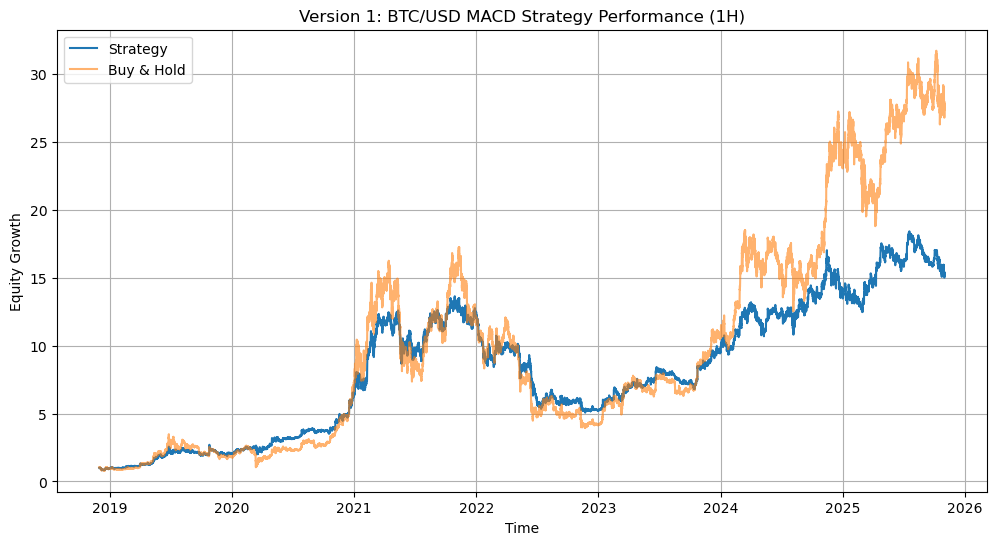

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df_h1["Time"], df_h1["Equity"], label="Strategy")
plt.plot(df_h1["Time"], df_h1["BuyHold"], label="Buy & Hold", alpha=0.6)
plt.legend()
plt.title("Version 1: BTC/USD MACD Strategy Performance (1H)")
plt.xlabel("Time")
plt.ylabel("Equity Growth")
plt.grid(True)
plt.show()

# Version2

Performance Comparison (Version 2)
                    Annualized Return Annualized Volatility Sharpe Ratio  \
Strategy (Multi‑TF)            59.68%                28.22%      211.52%   
Buy & Hold                     52.26%                60.84%       85.90%   

                    Max Drawdown  
Strategy (Multi‑TF)      -28.97%  
Buy & Hold               -77.19%  


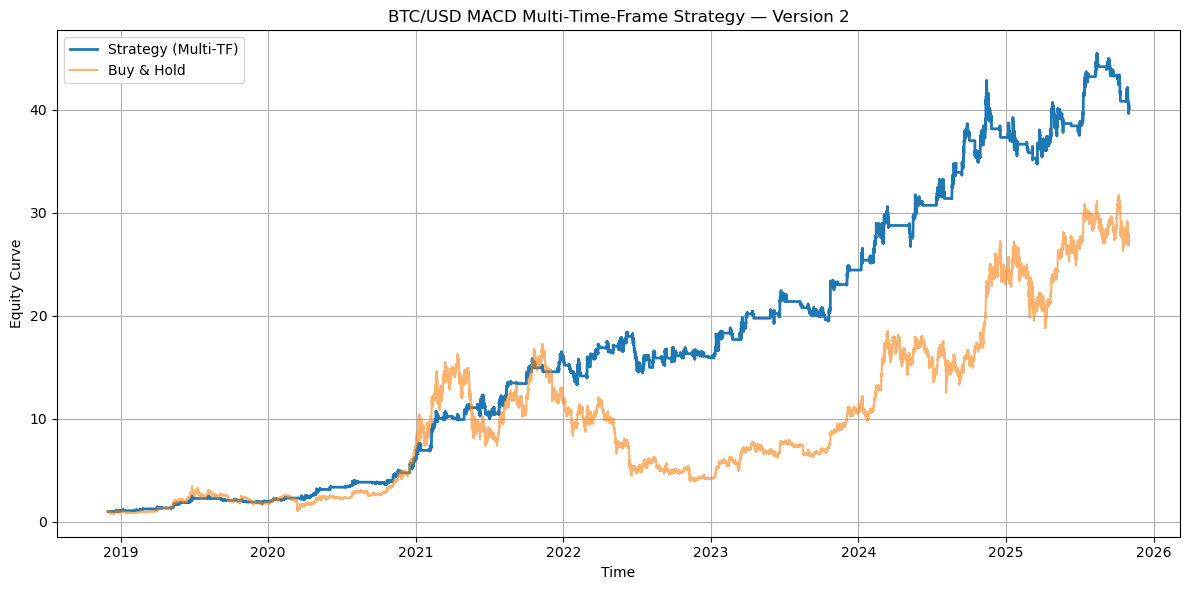

In [37]:
"""
Version 2: Multi-Time-Frame MACD Strategy (BTC/USD)
---------------------------------------------------
Combines 1D and 1H MACD to filter noise and trade only when both trends align.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------------------------------------------
# 1. 数据载入
# ----------------------------------------------------------------
df_1h = pd.read_csv("Gemini_BTCUSD_1h_clean.csv", parse_dates=["Time"]).sort_values("Time")
df_1d = pd.read_csv("Gemini_BTCUSD_1d_clean.csv", parse_dates=["Time"]).sort_values("Time")

# ----------------------------------------------------------------
# 2. MACD计算函数
# ----------------------------------------------------------------
def add_macd(df, fast=12, slow=26, signal=9):
    df["EMA_fast"] = df["Close"].ewm(span=fast, adjust=False).mean()
    df["EMA_slow"] = df["Close"].ewm(span=slow, adjust=False).mean()
    df["MACD"] = df["EMA_fast"] - df["EMA_slow"]
    df["Signal"] = df["MACD"].ewm(span=signal, adjust=False).mean()
    df["Hist"] = df["MACD"] - df["Signal"]
    return df

df_1h = add_macd(df_1h)
df_1d = add_macd(df_1d)

# ----------------------------------------------------------------
# 3. 将日线趋势合并到小时线
# ----------------------------------------------------------------
# 按日频重采样 D1 → H1
df_1d["Trend"] = np.where(df_1d["MACD"] > df_1d["Signal"], 1, -1)
df_1d_day = df_1d[["Time", "Trend"]].copy()
df_1d_day["Time"] = df_1d_day["Time"].dt.floor("D")

# 小时级别数据时间戳对齐
df_1h["Date_key"] = df_1h["Time"].dt.floor("D")
df_merged = pd.merge(df_1h, df_1d_day, how="left", left_on="Date_key", right_on="Time", suffixes=("", "_D1"))
df_merged.drop(columns=["Time_D1"], inplace=True)

# 日线趋势前向填充
df_merged["Trend"] = df_merged["Trend"].ffill().fillna(0)

# ----------------------------------------------------------------
# 4. 小时级触发信号 + 日线过滤
# ----------------------------------------------------------------
df = df_merged.copy()
df["LongSignal"] = 0

# 仅当 D1 看多 才允许执行 H1 金叉信号
buy_condition = (
    (df["Trend"] == 1)
    & (df["MACD"] > df["Signal"])
    & (df["MACD"].shift(1) <= df["Signal"].shift(1))
)
sell_condition = (
    (df["MACD"] < df["Signal"])
    & (df["MACD"].shift(1) >= df["Signal"].shift(1))
)

df.loc[buy_condition, "LongSignal"] = 1
df.loc[sell_condition, "LongSignal"] = -1

# ----------------------------------------------------------------
# 5. 构建持仓与计算收益
# ----------------------------------------------------------------
df["Position"] = np.nan
df.loc[df["LongSignal"] == 1, "Position"] = 1
df.loc[df["LongSignal"] == -1, "Position"] = 0
df["Position"] = df["Position"].ffill().fillna(0)

df["Return"] = df["Close"].pct_change()
df["Strategy_Return"] = df["Position"].shift(1) * df["Return"]
df["Equity"] = (1 + df["Strategy_Return"]).cumprod()
df["BuyHold"] = (1 + df["Return"]).cumprod()

# ----------------------------------------------------------------
# 6. 绩效指标函数
# ----------------------------------------------------------------
ann_factor = 24 * 365

def performance_metrics(equity, rets, ann_factor):
    R_ann = equity.iloc[-1] ** (ann_factor / len(equity)) - 1
    sigma_ann = np.std(rets) * np.sqrt(ann_factor)
    sharpe = R_ann / sigma_ann if sigma_ann != 0 else 0
    roll_max = equity.cummax()
    max_dd = (equity / roll_max - 1).min()

    return {
        "Annualized Return": R_ann,
        "Annualized Volatility": sigma_ann,
        "Sharpe Ratio": sharpe,
        "Max Drawdown": max_dd
    }

results = pd.DataFrame(
    [
        performance_metrics(df["Equity"], df["Strategy_Return"], ann_factor),
        performance_metrics(df["BuyHold"], df["Return"], ann_factor)
    ],
    index=["Strategy (Multi‑TF)", "Buy & Hold"]
)

# ----------------------------------------------------------------
# 7. 输出结果
# ----------------------------------------------------------------
print("Performance Comparison (Version 2)")
print(results.applymap(lambda x: f"{x:.2%}" if isinstance(x, (float,np.float64)) else x))

# ----------------------------------------------------------------
# 8. 可视化
# ----------------------------------------------------------------
plt.figure(figsize=(12,6))
plt.plot(df["Time"], df["Equity"], label="Strategy (Multi‑TF)", lw=2)
plt.plot(df["Time"], df["BuyHold"], label="Buy & Hold", alpha=0.6, lw=1.5)
plt.title("BTC/USD MACD Multi‑Time‑Frame Strategy — Version 2")
plt.xlabel("Time")
plt.ylabel("Equity Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Version3

Performance Comparison (Version 3)
              Annualized Return Annualized Volatility Sharpe Ratio  \
Strategy (V3)            50.87%                24.74%      205.64%   
Buy & Hold               52.26%                60.84%       85.90%   

              Max Drawdown  
Strategy (V3)      -26.59%  
Buy & Hold         -77.19%  


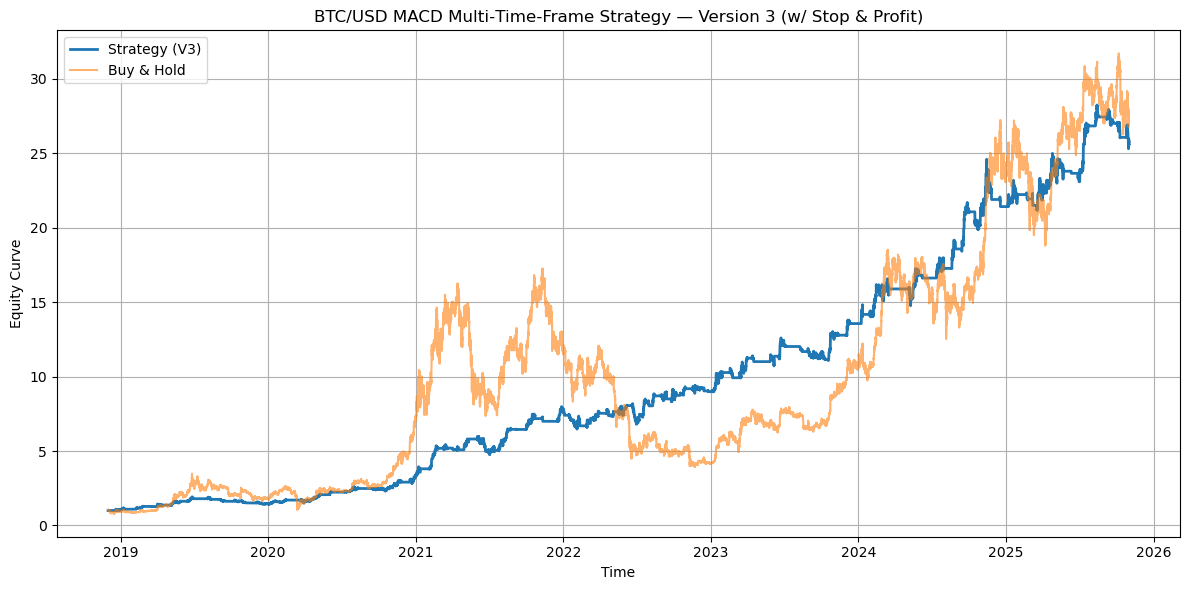

In [38]:
"""
Version 3: Multi-Time-Frame MACD Strategy with Dynamic Risk Controls
--------------------------------------------------------------------
Based on Version 2 but adds stop-loss and take-profit conditions.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------------------------------------------
# 1. 载入数据
# ----------------------------------------------------------------
df_1h = pd.read_csv("Gemini_BTCUSD_1h_clean.csv", parse_dates=["Time"]).sort_values("Time")
df_1d = pd.read_csv("Gemini_BTCUSD_1d_clean.csv", parse_dates=["Time"]).sort_values("Time")

# ----------------------------------------------------------------
# 2. MACD 计算函数
# ----------------------------------------------------------------
def add_macd(df, fast=12, slow=26, signal=9):
    df["EMA_fast"] = df["Close"].ewm(span=fast, adjust=False).mean()
    df["EMA_slow"] = df["Close"].ewm(span=slow, adjust=False).mean()
    df["MACD"] = df["EMA_fast"] - df["EMA_slow"]
    df["Signal"] = df["MACD"].ewm(span=signal, adjust=False).mean()
    df["Hist"] = df["MACD"] - df["Signal"]
    return df

df_1h = add_macd(df_1h)
df_1d = add_macd(df_1d)

# ----------------------------------------------------------------
# 3. 合并日线趋势
# ----------------------------------------------------------------
df_1d["Trend"] = np.where(df_1d["MACD"] > df_1d["Signal"], 1, -1)
df_1d_day = df_1d[["Time", "Trend"]].copy()
df_1d_day["Time"] = df_1d_day["Time"].dt.floor("D")

df_1h["Date_key"] = df_1h["Time"].dt.floor("D")

df = pd.merge(
    df_1h, df_1d_day, how="left",
    left_on="Date_key", right_on="Time",
    suffixes=("", "_D1")
)
df.drop(columns=["Time_D1"], inplace=True)
df["Trend"] = df["Trend"].ffill().fillna(0)

# ----------------------------------------------------------------
# 4. 参数设置
# ----------------------------------------------------------------
stop_loss_pct = 0.02     # 止损 2%
take_profit_pct = 0.05   # 止盈 5%

# ----------------------------------------------------------------
# 5. 信号逻辑（V2 同步）
# ----------------------------------------------------------------
df["Return"] = df["Close"].pct_change()
df["LongSignal"] = 0

buy_cond = (
    (df["Trend"] == 1)
    & (df["MACD"] > df["Signal"])
    & (df["MACD"].shift(1) <= df["Signal"].shift(1))
)
sell_cond = (
    (df["MACD"] < df["Signal"])
    & (df["MACD"].shift(1) >= df["Signal"].shift(1))
)

df.loc[buy_cond, "LongSignal"] = 1   # 开多
df.loc[sell_cond, "LongSignal"] = -1  # 平仓

# ----------------------------------------------------------------
# 6. 增加止盈止损
# ----------------------------------------------------------------
df["Position"] = 0
df["EntryPrice"] = np.nan

for i in range(1, len(df)):
    prev_pos = df.loc[i - 1, "Position"]
    curr_close = df.loc[i, "Close"]
    prev_close = df.loc[i - 1, "Close"]

    if prev_pos == 0:
        # 检查开仓信号
        if df.loc[i, "LongSignal"] == 1:
            df.loc[i, "Position"] = 1
            df.loc[i, "EntryPrice"] = curr_close
        else:
            df.loc[i, "Position"] = 0
    else:
        entry = df.loc[i - 1, "EntryPrice"]
        gain = (curr_close / entry) - 1

        stop_hit = gain <= -stop_loss_pct
        take_hit = gain >= take_profit_pct
        cross_exit = df.loc[i, "LongSignal"] == -1
        daily_reverse = df.loc[i, "Trend"] == -1

        if stop_hit or take_hit or cross_exit or daily_reverse:
            # 平仓
            df.loc[i, "Position"] = 0
            df.loc[i, "EntryPrice"] = np.nan
        else:
            # 持仓延续
            df.loc[i, "Position"] = 1
            df.loc[i, "EntryPrice"] = entry

# ----------------------------------------------------------------
# 7. 收益计算
# ----------------------------------------------------------------
df["Strategy_Return"] = df["Position"].shift(1) * df["Return"]
df["Equity"] = (1 + df["Strategy_Return"]).cumprod()
df["BuyHold"] = (1 + df["Return"]).cumprod()

# ----------------------------------------------------------------
# 8. 绩效评估函数
# ----------------------------------------------------------------
ann_factor = 24 * 365

def perf_metrics(equity, rets, ann_factor):
    R_ann = equity.iloc[-1] ** (ann_factor / len(equity)) - 1
    sigma_ann = np.std(rets) * np.sqrt(ann_factor)
    sharpe = R_ann / sigma_ann if sigma_ann != 0 else 0
    roll_max = equity.cummax()
    max_dd = (equity / roll_max - 1).min()
    return {
        "Annualized Return": R_ann,
        "Annualized Volatility": sigma_ann,
        "Sharpe Ratio": sharpe,
        "Max Drawdown": max_dd
    }

results = pd.DataFrame(
    [
        perf_metrics(df["Equity"], df["Strategy_Return"], ann_factor),
        perf_metrics(df["BuyHold"], df["Return"], ann_factor),
    ],
    index=["Strategy (V3)", "Buy & Hold"]
)

# ----------------------------------------------------------------
# 9. 输出结果
# ----------------------------------------------------------------
print("Performance Comparison (Version 3)")
print(results.applymap(lambda x: f"{x:.2%}" if isinstance(x, (float,np.float64)) else x))

# ----------------------------------------------------------------
# 10. 可视化
# ----------------------------------------------------------------
plt.figure(figsize=(12,6))
plt.plot(df["Time"], df["Equity"], label="Strategy (V3)", lw=2)
plt.plot(df["Time"], df["BuyHold"], label="Buy & Hold", alpha=0.6, lw=1.5)
plt.title("BTC/USD MACD Multi‑Time‑Frame Strategy — Version 3 (w/ Stop & Profit)")
plt.xlabel("Time")
plt.ylabel("Equity Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()